# ITSM Incident Management


### ABC Tech

## Project Summary

### Requirement

**ABC Tech is an organisation operating in IT-enabled business segment over a decade. On an average ABC Tech receives 22-25k IT incidents/tickets, which are handled to best practice by ITIL framework with incident management, problem management, change management and configuration management processes. ABC Tech management is looking for ways to improve the incident management process as recent customer survey results shows that incident management is rated as poor. Machine learning looks prospective to improve ITSM processes through prediction and automation.**

**They came up with 4 key areas, where Machine Learning can help ITSM processes in ABC Tech:**

**1.Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.**

**2.Forecast the incident volume in different fields, quarterly and annual. So that they can be better prepared with resources and technology planning.**

**3Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.**

**4.Predict RFC (Request for change) and possible failure/misconfiguration of ITSM assets**


## Analysis

**The data is ordinal, nominal as well as categorical. To analyze the data, various data processing techniques like Label Encoding and Standardization is used.For training the data and predicting the target, algorithms used are Support Vector Machine, Decision Tree, Random Forest, K-Nearest Neighbor, XGBoost Classifier and Artificial Neural Network. Volume Forecasting is done with the help of Statsmodels & Matplotlib.**

**The analysis is done in three parts:**

**1.Predicting Priorities: The predictor variables are Category, CI Category, CI Subcategory & WBS**

**2.Predicting Request for Change (RFC): The predictor variables are Category, CI Subcategory, WBS, Priority, Number of Related Interaction, Number of Related Incidents**

**3.Forecasting the Incident Volume: The predictor variable is opening time.**

## Summary

**The project is done with the purpose of:**

**1.Finding out factors which affects priority and training a model which accurately predicts it so that preventive measures can be taken for High Priority Tickets and reassigning can be reduced.**

**2.Finding out factors which affect RFC and predicting it.**

**3.Forecasting Incident Volume in the future so that they can be better prepared with resources and technology planning.**

### **The following steps are carried out:**

**1.Importing the data, necessary libraries, & exploring the data to look for missing values.**

**2.Selecting the features for analysis, label encoding the ordinal column and splitting the data into test & train.**

**3.Training the data using algorithms like Support Vector Machine, Decision Tree, Random Forest, K-Nearest Neighbor, XGBoost Classifier and Artificial Neural Network and checking the accuracy to find out which algorithm is the best.**

**4.Exporting the model with highest accuracy.**

**5.For Incident Volume Forecasting, Ticket Opening Time is taken and Time Series Forecasting is used.**

## Results

**For predicting Ticket Priority, Random Forest gives almost 98.5% accuracy. Predicting RFC accurately is not possible with this data. And Volume Forecasting is visualized with the help of Matplotlib throughout the year.**

**Importing the Essential Libraries for Data Science and Machine Learning**

In [30]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score, recall_score, precision_score, f1_score, classification_report
import warnings 
warnings.filterwarnings('ignore')

**Loading and Previewing the ITSM Dataset**

In [9]:
itsm = pd.read_csv(r"C:\Imarticus PGA\Project\ITSM_data.csv")
itsm.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,NaN,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,2/12/2013 12:31,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,...,NaN,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


**Exploring the ITSM Dataset: Shape, Columns, Data Info and Nulls**

In [20]:
print(itsm.shape)
print("---------------------------------------------------------------------------")

print(itsm.columns)
print("---------------------------------------------------------------------------")

print(itsm.info())
print("---------------------------------------------------------------------------")

print(itsm.isnull().sum()[itsm.isnull().sum() > 0])
print("---------------------------------------------------------------------------")


(46606, 25)
---------------------------------------------------------------------------
Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 n

### Data Processing / Data Munging
CI Category & CI Subcategory had a lot of labels which were replaced  to only take the major ones. Unknown values were replaced by Mode values.

In [22]:
#This code is used to clean the CI_Cat column by replacing specific values with more appropriate ones and 
#filling NaN values with a default value ('application').

itsm.CI_Cat.replace(['database'],'storage',inplace=True)
itsm.CI_Cat.replace(['applicationcomponent'],'subapplication',inplace=True)
itsm.CI_Cat.replace(['displaydevice','officeelectronics','Phone','networkcomponents'],'hardware',inplace=True)
itsm.CI_Cat.replace(np.nan,'application',inplace=True)

In [27]:
#Replacing specific values in the CI_Subcat column with more descriptive categories to standardize the dataset

itsm.CI_Subcat.replace('Desktop','Desktop Application',inplace=True)
itsm.CI_Subcat.replace(['Application Server','Virtual Tape Server','ESX Server','zOS Server','Neoview Server','X86 Server',
                       'Unix Server','Oracle Server','Windows Server in extern beheer','Thin Client','NonStop Server',
                       'Number','Windows Server','Linux Server',np.nan,'SharePoint Farm','Lines'],
                       'Server Based Application',inplace=True)
itsm.CI_Subcat.replace('RAC Service','Banking Device',inplace=True)
itsm.CI_Subcat.replace(['Iptelephony','Protocol','Net Device','IPtelephony','ESX Cluster','Standard Application'],
                       'Web Based Application',inplace=True)
itsm.CI_Subcat.replace(['VMWare','Security Software','zOS Systeem','Firewall','Database Software','VDI','Instance',
                       'MQ Queue Manager','Automation Software','Citrix','SAP','Encryption'],'System Software',inplace=True)
itsm.CI_Subcat.replace(['UPS','Omgeving'],'Client Based Application',inplace=True)
itsm.CI_Subcat.replace(['NonStop Storage','NonStop Harddisk','Tape Library','zOS Cluster','DataCenterEquipment',
                       'MigratieDummy'],'Database',inplace=True)
itsm.CI_Subcat.replace(['Modem','Router'],'Network Component',inplace=True)
itsm.CI_Subcat.replace('KVM Switches','Switch',inplace=True)

In [75]:
# Filling missing values (NaN) with default values or the most frequent values (mode) in each respective column to ensure data completeness.

itsm.Priority.fillna(4,inplace=True)
itsm.No_of_Reassignments.fillna(itsm.No_of_Reassignments.mode()[0],inplace=True)
itsm.Reopen_Time.fillna(itsm.Reopen_Time.mode()[0],inplace=True)
itsm.Resolved_Time.fillna(itsm.Resolved_Time.mode()[0],inplace=True)
itsm.Handle_Time_hrs.fillna(itsm.Handle_Time_hrs.mode()[0],inplace=True)
itsm.Closure_Code.fillna('Other',inplace=True)
itsm.No_of_Related_Interactions.fillna(1,inplace=True)
itsm.No_of_Related_Incidents.fillna(0,inplace=True)
itsm.No_of_Related_Changes.fillna(0,inplace=True)
itsm.Related_Change.fillna('No Change',inplace=True)


# 1. Predicting Priorities
**Only the features which are available when the tickets arrives can be used to predict priority. Therefore, we have used only 4 predictors.**

In [77]:
X = itsm.loc[:,['CI_Cat','CI_Subcat','WBS','Category']]
y = itsm.Priority

In [80]:
# Label Encoding
le = LabelEncoder()
for i in (0,1,2,3):
    X.iloc[:,i] = le.fit_transform(X.iloc[:,i])
    
X.head(3)

,CI_Cat,CI_Subcat,WBS,Category
0,5,16,137,1
1,0,16,70,1
2,0,4,74,3


In [81]:
# Splitting the data into test and train for calculating accuracy
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [82]:
# Standardization technique
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [83]:
x_train.shape

(34954, 4)

In [84]:
x_test.shape

(11652, 4)

# Model Building

###  1. Support Vector Machine


In [86]:
# Training the model
from sklearn.svm import SVC
svc = SVC(kernel='rbf',C=10,gamma=0.1).fit(x_train,y_train)
y_predict_svm = svc.predict(x_test)                            # Predicting the model
tab_svm = confusion_matrix(y_test,y_predict_svm)
tab_svm


array([[   0,    0,    0,    1,    0],
       [   0,  113,    5,   44,    7],
       [   0,   30,  406,  815,   80],
       [   0,   64,  252, 5421,  319],
       [   0,    7,   62, 1239, 2787]], dtype=int64)

In [87]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.7489701338825953
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.53      0.67      0.59       169
         3.0       0.56      0.31      0.39      1331
         4.0       0.72      0.90      0.80      6056
         5.0       0.87      0.68      0.76      4095

    accuracy                           0.75     11652
   macro avg       0.54      0.51      0.51     11652
weighted avg       0.75      0.75      0.74     11652



**Support Vector Machine Model Evaluation:**

Accuracy: 74.90%

Key Insights:

Class 4.0 performs very well with high precision (0.72) and recall (0.90).

Class 5.0 also shows decent performance with good precision (0.87) but lower recall (0.68).

Class 2.0 and Class 3.0 have moderate performance, with recall values below 0.70 and relatively lower precision.

Class 1.0 is predicted poorly, with both precision and recall being 0.00, likely due to its rarity.

Overall, the model performs well on Class 4.0 and Class 5.0, but has issues with predicting Class 1.0 effectively, as well as lower recall for Class 3.0.

### 2. Decision Tree


In [137]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
tab_dt = confusion_matrix(y_test,pred_dt)
tab_dt

array([[   0,    0,    0,    1,    0],
       [   0,  118,    6,   32,   13],
       [   0,   35,  835,  362,   99],
       [   0,   66,  360, 5304,  326],
       [   0,    9,   39,  762, 3285]], dtype=int64)

In [138]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

0.818915207689667
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.52      0.70      0.59       169
           3       0.67      0.63      0.65      1331
           4       0.82      0.88      0.85      6056
           5       0.88      0.80      0.84      4095

    accuracy                           0.82     11652
   macro avg       0.58      0.60      0.59     11652
weighted avg       0.82      0.82      0.82     11652



**Decision Tree Model Evaluation:**

Accuracy: 81.90%

Key Insights:

Class 4.0 shows strong performance with high precision and recall.

Class 5.0 also performs well, with good precision and recall.

Class 3.0 has decent performance, but there’s still room for improvement in recall.

Class 2.0 shows moderate performance.

Class 1.0 is not well predicted, with poor precision and recall, likely due to its rarity in the dataset.

Overall, the model performs well on most classes, particularly for 4.0 and 5.0, but struggles with 1.0.

### 3. Random Forest


In [94]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=27) 
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
tab_rf = confusion_matrix(y_test,pred_rf)
tab_rf

array([[   0,    0,    0,    1,    0],
       [   0,  118,    6,   32,   13],
       [   0,   34,  816,  380,  101],
       [   0,   64,  358, 5307,  327],
       [   0,    9,   35,  760, 3291]], dtype=int64)

In [95]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

0.8180569859251631
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.52      0.70      0.60       169
         3.0       0.67      0.61      0.64      1331
         4.0       0.82      0.88      0.85      6056
         5.0       0.88      0.80      0.84      4095

    accuracy                           0.82     11652
   macro avg       0.58      0.60      0.59     11652
weighted avg       0.82      0.82      0.82     11652



**Random Forest Model Evaluation:**

Accuracy: 81.81%

Key Insights:

The model performs well for class 4.0 and class 5.0, with high precision and recall.

Class 1.0 is misclassified, with poor performance.

Classes 2.0 and 3.0 show moderate performance, but there’s room for improvement.

Overall, the model is strong, especially for higher classes, but can be improved for class 1.0.

### 4. K-Nearest Neighbor


In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12,metric='euclidean') # Maximum accuracy for n=10
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
tab_knn = confusion_matrix(y_test,pred_knn)
tab_knn

array([[   0,    0,    0,    1,    0],
       [   0,  114,   10,   33,   12],
       [   0,   31,  676,  522,  102],
       [   0,   65,  299, 5382,  310],
       [   0,    7,   47,  786, 3255]], dtype=int64)

In [98]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

0.8090456573978716
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.53      0.67      0.59       169
         3.0       0.66      0.51      0.57      1331
         4.0       0.80      0.89      0.84      6056
         5.0       0.88      0.79      0.84      4095

    accuracy                           0.81     11652
   macro avg       0.57      0.57      0.57     11652
weighted avg       0.81      0.81      0.81     11652



**K-Nearest Neighbors Model Evaluation:**

Accuracy: 80.90%

Key Insights:

Class 4.0 performs well with high precision (0.80) and recall (0.89).

Class 5.0 also shows solid performance, with good precision (0.88) and recall (0.79).

Class 3.0 has decent precision (0.66) but lower recall (0.51), indicating room for improvement in prediction for this class.

Class 2.0 performs moderately, with precision (0.53) and recall (0.67).

Class 1.0 remains poorly predicted, with both precision and recall at 0.00, likely due to its rarity.

Overall, the model performs well on Class 4.0 and Class 5.0, with challenges in predicting Class 1.0 and Class 3.0 effectively.

In [ ]:
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
tab_rf = confusion_matrix(y_test,pred_rf)
tab_rf

### 5. Artificial Neural Network



In [107]:
# Training the model
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train, y_train)
pred_mlp = rf.predict(x_test)
tab_mlp = confusion_matrix(y_test,pred_mlp)
tab_mlp

array([[   0,    0,    0,    1,    0],
       [   0,  118,    6,   32,   13],
       [   0,   34,  816,  380,  101],
       [   0,   64,  358, 5307,  327],
       [   0,    9,   35,  760, 3291]], dtype=int64)

In [108]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,pred_mlp))
print(classification_report(y_test,pred_mlp))

0.8180569859251631
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.52      0.70      0.60       169
           3       0.67      0.61      0.64      1331
           4       0.82      0.88      0.85      6056
           5       0.88      0.80      0.84      4095

    accuracy                           0.82     11652
   macro avg       0.58      0.60      0.59     11652
weighted avg       0.82      0.82      0.82     11652



**Accuracy: 81.81%**

Key Insights:

Class 4.0 performs well with high precision (0.82) and recall (0.88).

Class 5.0 also shows solid performance with good precision (0.88) and recall (0.80).

Class 3.0 has decent precision (0.67) but lower recall (0.61), indicating some room for improvement in prediction for this class.

Class 2.0 performs moderately with precision (0.52) and recall (0.70).

Class 1.0 is poorly predicted, with both precision and recall at 0.00, likely due to its rarity.

Overall, the model performs well on Class 4.0 and Class 5.0, but struggles with Class 1.0 and Class 3.0.

### 6. Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)
tab_lr = confusion_matrix(y_test, pred_lr)
tab_lr

array([[   0,    0,    0,    1,    0],
       [   0,    0,    0,  167,    2],
       [   0,    0,    0, 1293,   38],
       [   0,    0,    0, 5902,  154],
       [   0,    0,    0, 2105, 1990]], dtype=int64)

In [111]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

0.6773086165465156
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00       169
           3       0.00      0.00      0.00      1331
           4       0.62      0.97      0.76      6056
           5       0.91      0.49      0.63      4095

    accuracy                           0.68     11652
   macro avg       0.31      0.29      0.28     11652
weighted avg       0.64      0.68      0.62     11652



**Accuracy: 67.73%**

Key Insights:

Class 4.0 has good recall (0.97) but lower precision (0.62).

Class 5.0 has high precision (0.91) but low recall (0.49).

Classes 2.0, 3.0, and 1.0 are poorly predicted, with low precision and recall.

Overall, the model performs well on Class 4.0 but struggles with the other classes.

# 2. Predicting Request For Change (RFC)


### Feature Selection

In [125]:
# Selecting the predictors
X1 = itsm.loc[:,['CI_Subcat','WBS','Priority','Category','No_of_Related_Interactions','No_of_Related_Incidents']]
y1 = itsm.No_of_Related_Changes

In [126]:
X1.head(3)

,CI_Subcat,WBS,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents
0,Web Based Application,WBS000162,4.0,incident,1.0,2.0
1,Web Based Application,WBS000088,3.0,incident,1.0,1.0
2,Desktop Application,WBS000092,4.0,request for information,1.0,0.0


In [127]:
le= LabelEncoder()
for i in (0,1,3,4):
    X1.iloc[:,i] = le.fit_transform(X1.iloc[:,i])

In [128]:
# Splitting into train and test for calculating the accuracy

x1_train, x1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.25,random_state=10)

In [129]:
# Standardization technique is used
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

In [130]:
X1_train.shape

(34954, 6)

In [131]:
X1_test.shape

(11652, 6)

# Model Building

### 1. Decision Tree


In [136]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x1_train,y1_train)
pred_dt1 = dt.predict(x1_test)
tab_dt1 = confusion_matrix(y1_test,pred_dt1)
tab_dt1

array([[11506,    18,     1,     0,     0],
       [  116,     2,     0,     0,     1],
       [    7,     0,     0,     0,     0],
       [    1,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0]], dtype=int64)

In [139]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y1_test,pred_dt1))
print(classification_report(y1_test,pred_dt1))

0.9876416065911432
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     11525
         1.0       0.10      0.02      0.03       119
         2.0       0.00      0.00      0.00         7
         3.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         0

    accuracy                           0.99     11652
   macro avg       0.22      0.20      0.20     11652
weighted avg       0.98      0.99      0.98     11652



## 2. Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=27) 
rf.fit(x1_train,y1_train)
pred_rf1 = rf.predict(x1_test)
tab_rf1 = confusion_matrix(y1_test,pred_rf1)
tab_rf1

array([[11516,     9,     0,     0],
       [  118,     1,     0,     0],
       [    7,     0,     0,     0],
       [    1,     0,     0,     0]], dtype=int64)

In [141]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y1_test,pred_rf1))
print(classification_report(y1_test,pred_rf1))

0.9884140061791967
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     11525
         1.0       0.10      0.01      0.02       119
         2.0       0.00      0.00      0.00         7
         3.0       0.00      0.00      0.00         1

    accuracy                           0.99     11652
   macro avg       0.27      0.25      0.25     11652
weighted avg       0.98      0.99      0.98     11652



## 3. Forecasting the Incident Volume


In [159]:
# Imporing the necessary columns
iv = itsm.loc[:,['Incident_ID','Open_Time']]
iv.head()

,Incident_ID,Open_Time
0,IM0000004,5/2/2012 13:32
1,IM0000005,12/3/2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10/8/2012 11:01


### Data Processing / Data Munging

In [160]:
import datetime as dt
# Coverting all the values in proper Datetime format
for i in range(len(iv.Open_Time)):
    if (iv.Open_Time[i][1]=='/'):
        iv.Open_Time[i] = dt.datetime.strptime(iv.Open_Time[i],'%d/%m/%Y %H:%M').date()
    elif (iv.Open_Time[i][2]=='/'):
        iv.Open_Time[i] = dt.datetime.strptime(iv.Open_Time[i],'%d/%m/%Y %H:%M').date()
    else:
        iv.Open_Time[i] = dt.datetime.strptime(iv.Open_Time[i],'%d-%m-%Y %H:%M').date()

In [161]:
iv.head()

,Incident_ID,Open_Time
0,IM0000004,2012-02-05
1,IM0000005,2012-03-12
2,IM0000006,2012-03-29
3,IM0000011,2012-07-17
4,IM0000012,2012-08-10


In [162]:
# Adding a new column which will have the number of tickets per day
iv['No_Incidents'] = iv.groupby('Open_Time')['Incident_ID'].transform('count')

In [163]:
iv.drop(['Incident_ID'],axis=1,inplace=True)
iv.drop_duplicates(inplace=True)

In [164]:
iv.head(3)

,Open_Time,No_Incidents
0,2012-02-05,1
1,2012-03-12,1
2,2012-03-29,1


In [166]:
# Setting Date as the Index
iv.Open_Time = pd.to_datetime(iv.Open_Time)
iv = iv.set_index(['Open_Time']) 
iv.head()

,No_Incidents
Open_Time,
2012-02-05,1
2012-03-12,1
2012-03-29,1
2012-07-17,1
2012-08-10,2


In [167]:
# Checking range of dates for our values
print(iv.index.min(),'to',iv.index.max())

2012-02-05 00:00:00 to 2014-03-31 00:00:00


In [169]:
# Making a new Series with frequency as Day
data1 = iv['No_Incidents']
data1 = data1.asfreq('D')
data1.head()

Open_Time
2012-02-05    1.0
2012-02-06    NaN
2012-02-07    NaN
2012-02-08    NaN
2012-02-09    NaN
Freq: D, Name: No_Incidents, dtype: float64

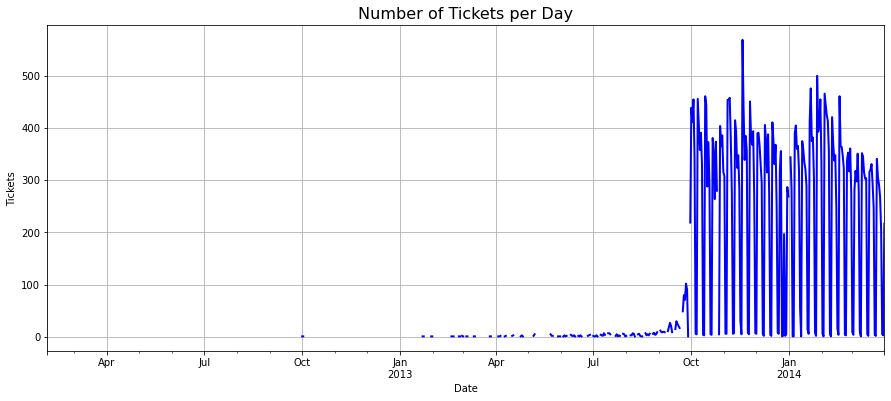

In [174]:
import matplotlib.pyplot as plt

# Plotting number of tickets per day with customizations
data1.plot(figsize=(15, 6), color='b', linestyle='-', linewidth=2)
plt.title('Number of Tickets per Day', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Tickets')
plt.grid()
plt.show()

In [176]:
# Since not many tickets before October 2013, we consider only the latter values
incfrom2013 = iv[iv.index > dt.datetime(2013,10,1)]
incfrom2013.head()

,No_Incidents
Open_Time,
2013-10-02,412
2013-10-03,455
2013-10-04,345
2013-10-07,456
2013-10-05,6


In [177]:
# new Series
data2 = incfrom2013['No_Incidents']
data2 = data2.asfreq('D')
data2.index

DatetimeIndex(['2013-10-02', '2013-10-03', '2013-10-04', '2013-10-05',
               '2013-10-06', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=181, freq='D')

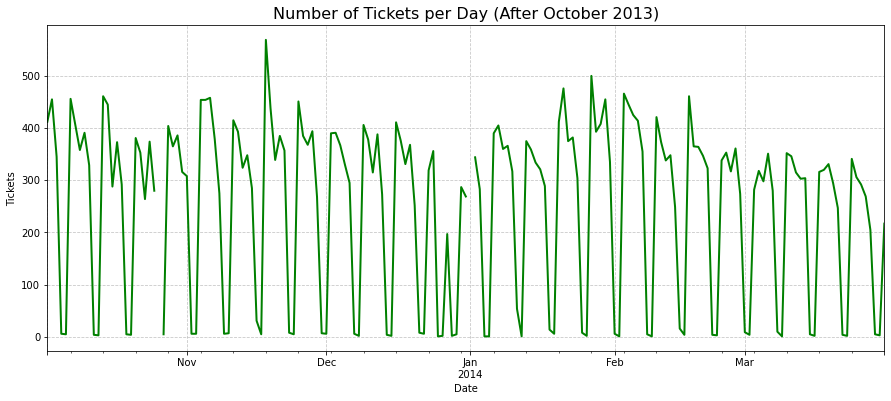

In [178]:
# Plotting number of tickets per day after October 2013 with customizations
data2.plot(figsize=(15, 6), color='g', linestyle='-', linewidth=2)
plt.title('Number of Tickets per Day (After October 2013)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Tickets')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [179]:
# Making a list of values for p,d & q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [180]:
# Checking the AIC values per pairs
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(data2,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:2539.6180293605685
ARIMA(0, 0, 1) - AIC:2373.7853824723097
ARIMA(0, 1, 0) - AIC:2371.128960804689
ARIMA(0, 1, 1) - AIC:2313.136334869047
ARIMA(1, 0, 0) - AIC:2365.291646936565
ARIMA(1, 0, 1) - AIC:2337.3125086933514
ARIMA(1, 1, 0) - AIC:2373.128068065154
ARIMA(1, 1, 1) - AIC:2294.431581243617


In [181]:
# Choosing the model with minimum AIC and the ARIMA Model for Time Series Forecasting
mod = sm.tsa.statespace.SARIMAX(data2,order=(1,1,1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3386      0.090      3.771      0.000       0.163       0.515
ma.L1         -0.9989      0.428     -2.332      0.020      -1.839      -0.159
sigma2       2.52e+04   9781.767      2.576      0.010    6023.442    4.44e+04


In [182]:
# Predicting the future values and the confidence interval
pred = results.get_prediction(start=pd.to_datetime('2014-3-3'),end=pd.to_datetime('2014-10-30'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

2014-03-03    172.0
2014-03-04    266.0
2014-03-05    279.0
2014-03-06    272.0
2014-03-07    291.0
              ...  
2014-10-26    252.0
2014-10-27    252.0
2014-10-28    252.0
2014-10-29    252.0
2014-10-30    252.0
Freq: D, Name: predicted_mean, Length: 242, dtype: float64

In [183]:
# Predicting the future values and the confidence interval
pred = results.get_prediction(start=pd.to_datetime('2014-3-3'),end=pd.to_datetime('2014-10-30'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

2014-03-03    172.0
2014-03-04    266.0
2014-03-05    279.0
2014-03-06    272.0
2014-03-07    291.0
              ...  
2014-10-26    252.0
2014-10-27    252.0
2014-10-28    252.0
2014-10-29    252.0
2014-10-30    252.0
Freq: D, Name: predicted_mean, Length: 242, dtype: float64

### Visualization

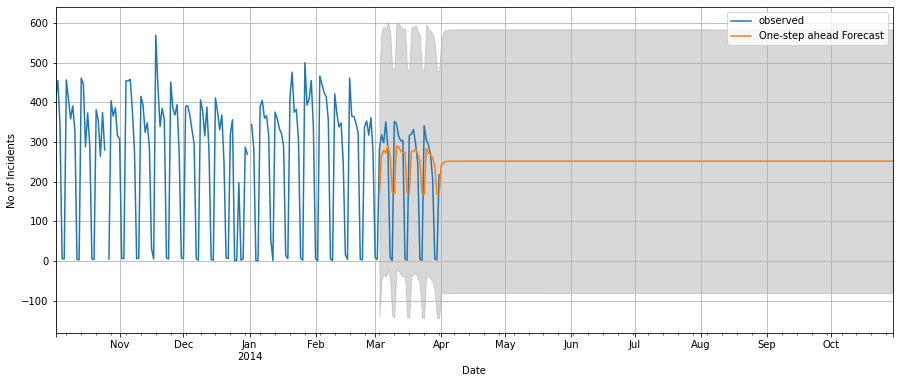

In [86]:
ax = data2['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',figsize=(15, 6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents') 
plt.legend()
plt.grid()
plt.show()